In [12]:
import tensorflow as tf 
import cv2
import os
import  matplotlib.pyplot as plt 
import numpy as np

In [5]:
img_array=cv2.imread("C:\\Users\\dixit\\MachineLearning\\train\\angry\\Training_3908.jpg")

In [6]:
img_array.shape

(48, 48, 3)

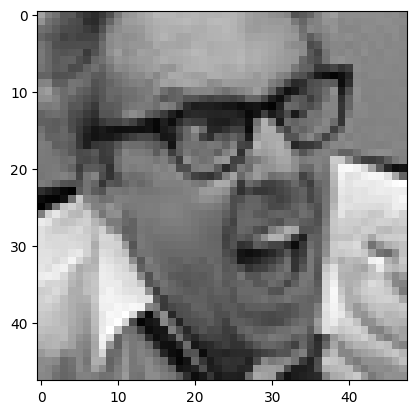

In [7]:
plt.imshow(img_array)

In [8]:
datadirectory="C:\\Users\\dixit\\MachineLearning\\train"

In [9]:
classes=["angry","disgust","fear","happy","neutral","sad","surprise"]# list of classes exact name of folder 

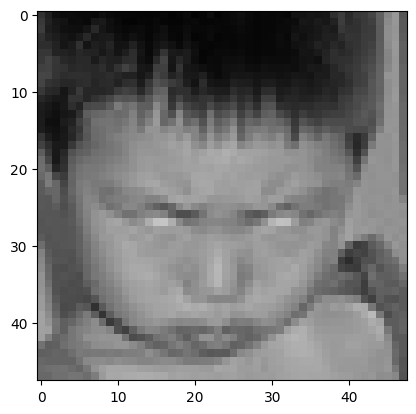

In [10]:
for cat in classes:
    path=os.path.join(datadirectory,cat)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

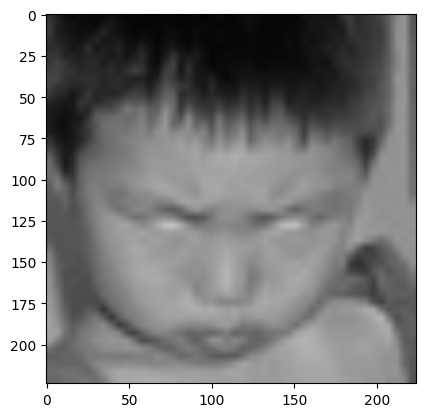

In [11]:
img_size=224 # image net == 224X 224
new_array=cv2.resize(img_array,(img_size,img_size))
plt.imshow(cv2.cvtColor(new_array,cv2.COLOR_BGR2RGB))
plt.show()

In [12]:
new_array.shape

(224, 224, 3)

read all the images and convert into the array 

In [14]:
training_Data = []  # Data array to hold image arrays and labels

def create_training_Data():
    for cat in classes:
        path = os.path.join(datadirectory, cat)
        class_num = classes.index(cat)  # Label: 0, 1, 2, ...
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_Data.append([new_array, class_num])
            except Exception as e:
                pass  # Skip unreadable or corrupt images
  
# Call the function to populate training_Data
create_training_Data()

# Check how many images were loaded
print(len(training_Data))

28709


In [15]:
import random
random.shuffle(training_Data)


In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)

ntrain_generator = datagen.flow_from_directory(
    datadirectory,
    target_size=(img_size, img_size),
    batch_size=32,
    class_mode='sparse'
)

Found 28709 images belonging to 7 classes.


In [17]:
x = []
y = []

for features, labels in training_Data[:5000]:  # Load only 5K at a time
    x.append(features)
    y.append(labels)

x = np.array(x, dtype='float16') / 255.0
y = np.array(y)

x=np.array(x).reshape(-1,img_size,img_size,3)## converting it to 4 dimension

In [18]:
x=x/255.0

In [19]:
x.shape

(5000, 224, 224, 3)

In [20]:
y[1000]

3

In [21]:
y[0]

4

deep learning model for training -transfer learning 

In [23]:
model=tf.keras.applications.MobileNetV2() ## pre tarined model 

In [21]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [1]:
from tensorflow.keras import layers

transfer learning -turning weights will start from last check point 

In [3]:
base_input=model.layers[0].input

NameError: name 'model' is not defined

In [ ]:
base_output=model.layers[-2].output

In [37]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [38]:
final_output=layers.Dense(128)(base_output)## adding the new layer after the output of the global pooling layer
final_output=layers.Activation('relu')(final_output)
final_output=layers.Dense(64)(final_output)
final_output=layers.Activation('relu')(final_output)
final_output=layers.Dense(7,activation='softmax')(final_output)


In [39]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [40]:
new_model=tf.keras.Model(inputs=base_input,outputs=final_output)

In [30]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [41]:
new_model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
new_model.fit(x,y,epochs=5)

Epoch 1/5
157/157 [==============================] - 417s 3s/step - loss: 1.4782 - accuracy: 0.4394
Epoch 2/5
157/157 [==============================] - 375s 2s/step - loss: 1.2267 - accuracy: 0.5278
Epoch 3/5
157/157 [==============================] - 454s 3s/step - loss: 1.1425 - accuracy: 0.5814
Epoch 4/5
157/157 [==============================] - 348s 2s/step - loss: 1.0647 - accuracy: 0.5996
Epoch 5/5
135/157 [========================>.....] - ETA: 8:16 - loss: 0.9611 - accuracy: 0.6475

In [6]:
new_model.save("my_model_64p35.h5")

NameError: name 'new_model' is not defined

In [14]:
#new_model=tf.keras.models.load_model('Final_model_95p07.h0')
new_model = tf.keras.models.load_model('C:\\Users\\\dixit\\my_model_64p35.h5')

In [16]:
# import os
# print(os.getcwd())
# print(os.listdir())


In [28]:
# import cv2
# import numpy as np
# from tensorflow.keras.models import load_model


# # Load model
# new_model = load_model("my_model_64p35.h5")   # <-- ensure correct path


# # Emotion labels in order of model output
# emotion_labels = ["angry", "disgust", "fear", "happy", "sad", "surprise", "neutral"]


# # Initialize webcam
# cap = cv2.VideoCapture(1)
# if not cap.isOpened():
#     cap = cv2.VideoCapture(0)
# if not cap.isOpened():
#     raise IOError("Cannot open webcam")


# # Haar cascade for face detection
# faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


# while True:
#     ret, frame = cap.read()
#     gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#     faces = faceCascade.detectMultiScale(gray, 1.1, 4)

#     for (x, y, w, h) in faces:
#         roi_color = frame[y:y+h, x:x+w]
#         roi_gray = gray[y:y+h, x:x+w]

#         cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

#         # Resize face correctly for model
#         face_roi = cv2.resize(roi_color, (224, 224))
#         face_roi = face_roi / 255.0
#         face_roi = np.expand_dims(face_roi, axis=0)

#         # Prediction
#         predictions = new_model.predict(face_roi)
#         emotion_index = np.argmax(predictions)
#         status = emotion_labels[emotion_index]

#         # Display label on frame
#         x1, y1, w1, h1 = 0, 0, 250, 60
#         cv2.rectangle(frame, (x1, y1), (x1 + w1, y1 + h1), (0, 0, 0), -1)
#         cv2.putText(frame, status, (x1 + 10, y1 + 40),
#                     cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 255, 0), 2)
#         cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

#     cv2.imshow('Face Emotion Recognition', frame)

#     if cv2.waitKey(2) & 0xFF == ord('q'):
#         break

# cap.release()
# cv2.destroyAllWindows()


1/1 [==============================] - 0s 47ms/step


In [21]:
# import cv2
# import numpy as np
# from tensorflow.keras.models import load_model

# # Load your pre-trained emotion recognition model
# new_model = load_model("my_model_64p35.h5")  # <-- update path if needed

# # Font settings
# font_scale = 1.5
# font = cv2.FONT_HERSHEY_PLAIN

# # Create a black image with a white rectangle and text
# rectangle_bgr = (255, 255, 255)
# img = np.zeros((500, 500), dtype=np.uint8)
# text = "Some text in a box!"
# (text_width, text_height) = cv2.getTextSize(text, font, fontScale=font_scale, thickness=1)[0]
# text_offset_x = 10
# text_offset_y = img.shape[0] - 25
# box_coords = (
#     (text_offset_x, text_offset_y),
#     (text_offset_x + text_width + 2, text_offset_y - text_height - 2)
# )
# cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED)
# cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale=font_scale, color=(0, 0, 0), thickness=1)
# cv2.imshow("Text Box", img)
# cv2.waitKey(2000)
# cv2.destroyAllWindows()

# # Initialize webcam
# cap = cv2.VideoCapture(1)
# if not cap.isOpened():
#     cap = cv2.VideoCapture(0)
# if not cap.isOpened():
#     raise IOError("Cannot open webcam")

# # Load Haar cascade for face detection
# faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# emotion_labels = ["angry", "disgust", "fear", "happy", "sad", "surprise", "neutral"]

# while True:
#     ret, frame = cap.read()
#     gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#     faces = faceCascade.detectMultiScale(gray, 1.1, 4)

#     for (x, y, w, h) in faces:
#         roi_color = frame[y:y+h, x:x+w]
#         roi_gray = gray[y:y+h, x:x+w]
#         cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

#         facess = faceCascade.detectMultiScale(roi_gray)
#         if len(facess) == 0:
#             print("face not detected")
#         else:
#             for (ex, ey, ew, eh) in facess:
#                 face_roi = roi_color[ey: ey+eh, ex: ex+ew]

#                 final_image = cv2.resize(face_roi, (224, 224))
#                 final_image = final_image / 255.0
#                 final_image = np.expand_dims(final_image, axis=0)

#                 predictions = new_model.predict(final_image)
#                 emotion_index = np.argmax(predictions)
#                 status = emotion_labels[emotion_index]

#                 x1, y1, w1, h1 = 0, 0, 175, 75
#                 cv2.rectangle(frame, (x1, y1), (x1+w1, y1+h1), (0, 0, 0), -1)
#                 cv2.putText(frame, status, (x1 + 10, y1 + 45),
#                             cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
#                 cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

#     cv2.imshow('face emotion recognition ', frame)
#     if cv2.waitKey(2) & 0xFF == ord('q'):
#         break

# cap.release()
# cv2.destroyAllWindows()


1/1 [==============================] - 0s 46ms/step
face not detected
1/1 [==============================] - 0s 59ms/step
face not detected
1/1 [==============================] - 0s 52ms/step
face not detected
1/1 [==============================] - 0s 55ms/step
face not detected
1/1 [==============================] - 0s 55ms/step
face not detected
1/1 [==============================] - 0s 49ms/step
face not detected
1/1 [==============================] - 0s 56ms/step
face not detected
1/1 [==============================] - 0s 52ms/step
face not detected
1/1 [==============================] - 0s 49ms/step
face not detected
1/1 [==============================] - 0s 55ms/step
face not detected
1/1 [==============================] - 0s 57ms/step
face not detected
1/1 [==============================] - 0s 59ms/step
face not detected
1/1 [==============================] - 0s 59ms/step
face not detected
1/1 [==============================] - 0s 56ms/step
face not detected
face not detected
fa

In [64]:
!pip install deepface

  Using cached gdown-5.2.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached tensorflow-2.20.0-cp312-cp312-win_amd64.whl.metadata (4.6 kB)
  Using cached keras-3.12.0-py3-none-any.whl.metadata (5.9 kB)
  Using cached flask_cors-6.0.1-py3-none-any.whl.metadata (5.3 kB)
  Using cached retina_face-0.0.17-py3-none-any.whl.metadata (10 kB)
  Using cached fire-0.7.1-py3-none-any.whl.metadata (5.8 kB)
  Using cached gunicorn-23.0.0-py3-none-any.whl.metadata (4.4 kB)
  Using cached termcolor-3.2.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached namex-0.1.0-py3-none-any.whl.metadata (322 bytes)
  Using cached optree-0.18.0-cp312-cp312-win_amd64.whl.metadata (35 kB)
  Using cached ml_dtypes-0.5.4-cp312-cp312-win_amd64.whl.metadata (9.2 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.9.23-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.met

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.37.1 requires protobuf<6,>=3.20, but you have protobuf 6.33.1 which is incompatible.
torch 2.9.1 requires sympy>=1.13.3, but you have sympy 1.12 which is incompatible.


In [74]:

#####################-----------------NEW CORRECT CODE-----------------------------------------------

import cv2
from deepface import DeepFace

# Start webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Analyze all faces in the frame
    try:
        results = DeepFace.analyze(
            img_path = frame,
            actions = ['emotion'],
            enforce_detection = False
        )

        # If only one face, convert to list
        if not isinstance(results, list):
            results = [results]

        # Draw on each face
        for res in results:
            x, y, w, h = res['region']['x'], res['region']['y'], res['region']['w'], res['region']['h']
            emotion = res['dominant_emotion']

            # Draw rectangle
            cv2.rectangle(frame, (x,y), (x+w,y+h), (0,255,0), 2)

            # Label emotion
            cv2.putText(frame, emotion, (x, y-10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,0,0), 2)

    except Exception as e:
        print("Error:", e)

    cv2.imshow("Emotion Detection", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
